<a href="https://colab.research.google.com/github/FelixSnz/Cursos/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

acc:  0.8666666666666667
Predicted:  setosa  |  Actual:  setosa
Predicted:  virginica  |  Actual:  virginica
Predicted:  setosa  |  Actual:  setosa
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  setosa  |  Actual:  setosa
Predicted:  virginica  |  Actual:  versicolor
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  virginica  |  Actual:  virginica
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  virginica  |  Actual:  virginica
Predicted:  versicolor  |  Actual:  versicolor
Predicted:  virginica  |  Actual:  versicolor


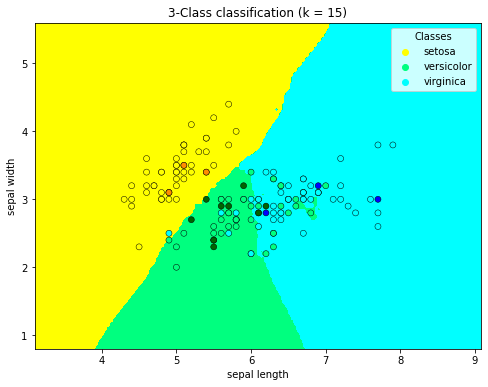

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier


# encode target from str to int
encoder = preprocessing.LabelEncoder()
cls = encoder.fit_transform(data['class'])

classes = np.array(['setosa','versicolor','virginica'])
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

#separacion de datos
X = np.array(data[['sl','sw']])
y = np.array(cls)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.1)



#Model creation and training
n_neighbors = 15
model = KNeighborsClassifier(n_neighbors)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print('acc: ', acc)
predicted = model.predict(x_test)

for x in range(len(predicted)):
    print("Predicted: ", classes[predicted[x]], ' | ', "Actual: ", classes[y_test[x]])
    n = model.kneighbors([x_test[x]], 9, True)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train[:, 0].min() - 1.2, x_train[:, 0].max() + 1.2
y_min, y_max = x_train[:, 1].min() - 1.2, x_train[:, 1].max() + 1.2

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_train = ['yellow', 'springgreen', 'cyan']
cmap_light = ListedColormap(cmap_train)
cmap_test = ['darkorange', 'darkgreen', 'blue']

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
ax = sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=classes[y_train], hue_order=classes,
                palette=cmap_train, edgecolor="black")
ax.legend(title='Classes')

ax1 = sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=classes[y_test], hue_order=classes,
                palette=cmap_test, edgecolor="black", legend=False)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()
